<a href="https://colab.research.google.com/github/BabaGeorge22/MAT-421/blob/main/HWH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module H Homework: Sections 22.1-22.3 - George Tome

Section 22.1 - ODE Initial Value Problem Statement

-An Ordinary Differential Equation is a differential equation that contains functions and their derivatives with respect to a single independent variable, typically time. They are utilized in describing how systems evolve through time.


-A classic example is the pendulum, whose state is constantly varying under gravity. Even though simple examples can be solved analytically at times, most real world systems are complex, and numerical methods have to be employed to obtain approximate solutions.


-Numerical techniques yield approximations by breaking the problem into small pieces such that we can approximate system behavior when we can't get exact solutions.

Section 22.2 - Reduction of Order

-Numerical methods can most naturally solve first order differential equations, those involving just the first derivative of the function. Unfortunately, problems in the real world generally present themselves naturally as higher order differential equations with a second derivative. We solve such equations by performing what's called a reduction of order.


-What this implies is that a single higher order equation is rewritten as a system of several first order equations. For every derivative of the original equation, a new variable is created in the new system. This breaks up the form and allows us to readily use numerical techniques.


-A good example is the pendulum equation, which is a second-order equation to begin with and can be rearranged into two first-order equations: one for angular velocity and one for angle. Another use might be population models like predator-prey models, which are naturally systems of first-order differential equations.

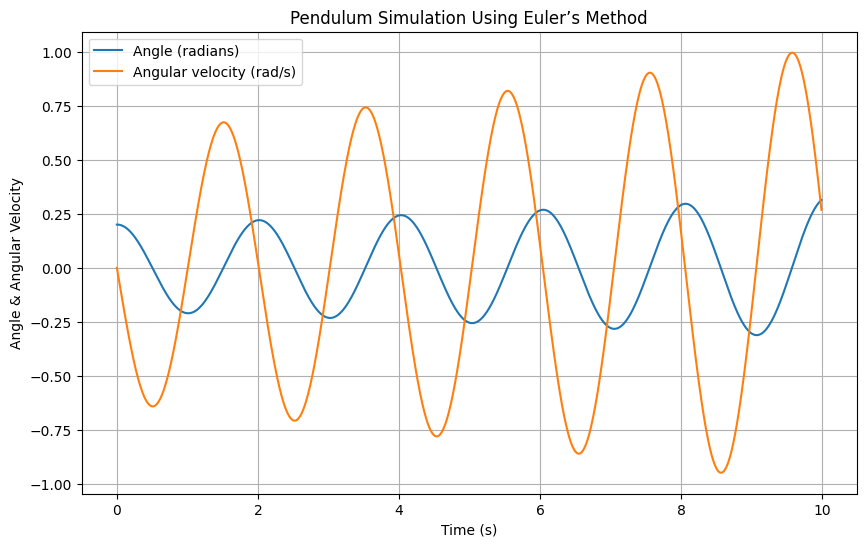

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the pendulum
g = 9.81      # acceleration due to gravity m/s^2
l = 1.0       # length of the pendulum m
theta0 = 0.2  # initial angle radians
omega0 = 0.0  # initial angular velocity rad/s

# Simulation parameters
h = 0.01                  # step size
t = np.arange(0, 10, h)   # time from 0 to 10 seconds

# Initialize arrays for angle theta and angular velocity omega
theta = np.zeros(len(t))
omega = np.zeros(len(t))

# Initial conditions
theta[0] = theta0
omega[0] = omega0

# Euler method loop
for i in range(len(t)-1):
    omega[i+1] = omega[i] - (g/l)*np.sin(theta[i])*h
    theta[i+1] = theta[i] + omega[i]*h

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, theta, label='Angle (radians)')
plt.plot(t, omega, label='Angular velocity (rad/s)')
plt.title('Pendulum Simulation Using Euler’s Method')
plt.xlabel('Time (s)')
plt.ylabel('Angle & Angular Velocity')
plt.legend()
plt.grid(True)
plt.show()

-Use Euler's method to approximate the angle and angular velocity of a simple pendulum.

-Resulting plot shows how the angle and angular velocity change over time.

-Accuracy improves when reducing the step size.

Section 22.3 - The Euler Method

Euler's Method moves forward in small steps taking the slope of a point and estimating the next function values. The smaller the steps, the better.

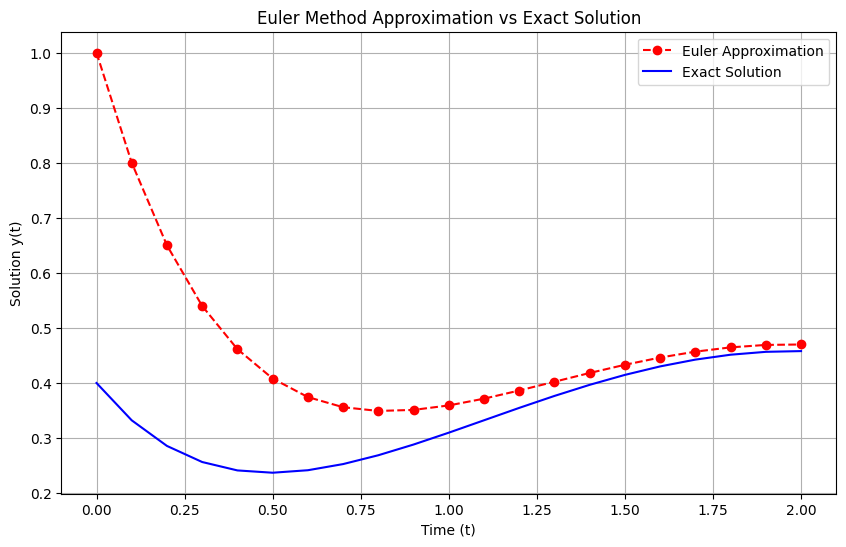

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def dydt(t, y):
    return -2 * y + np.sin(t)

# Parameters for the numerical solution
h = 0.1  # Step size
t = np.arange(0, 2 + h, h)  # Numerical grid from 0 to 2
y0 = 1  # Initial condition

# Initialize solution array
y = np.zeros(len(t))
y[0] = y0

# Euler Method for approximation
for i in range(len(t)-1):
    y[i+1] = y[i] + h * dydt(t[i], y[i])

# Exact solution for comparison
y_exact = (3*np.exp(-2*t) + 2*np.sin(t) - np.cos(t)) / 5

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'ro--', label='Euler Approximation')
plt.plot(t, y_exact, 'b-', label='Exact Solution')
plt.title('Euler Method Approximation vs Exact Solution')
plt.xlabel('Time (t)')
plt.ylabel('Solution y(t)')
plt.grid(True)
plt.legend()
plt.show()


-The red dashed points represent the Euler approximation computed by stepping forward incrementally.

-The continuous blue line is the exact solution obtained analytically.

-The Euler approximation closely follows the exact solution, especially when smaller step sizes are chosen.